In [1]:
import pandas as pd
import time
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [7]:


def read_indianPines():
    Indian_X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
    Indian_Y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
    #print(f"X shape: {X.shape}\ny shape: {y.shape}")
    return Indian_X, Indian_Y
    
def extract_pixels(X, y):
    q = X.reshape(-1, X.shape[2])
    df = pd.DataFrame(data = q)
    df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
    df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
    #df.to_csv('Dataset.csv')
    return df    

In [8]:
start = time.process_time()
### CLASSIFICATION OF DATASET###

#Read data
indian_X,indian_Y = read_indianPines()

#data dimensions
x, y, z = indian_X.shape

#reshapes arrays to have all data of each matrix into vectors
#indian_X2d = indian_X.reshape((x * y, z))
#indian_Y2d = indian_Y.reshape((x * y, 1))

data_indian = extract_pixels(indian_X, indian_Y)

data_x = data_indian[data_indian['class'] != 0]

indian_X2d = data_x.iloc[:, :-1].values

indian_Y2d = data_x.loc[:, 'class'].values 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(indian_X2d, indian_Y2d, test_size=0.3, random_state=11, stratify=indian_Y2d) # 25% train 75% test
print(y_train.shape, "   ", y_test.shape)

#Creates Svm Clasiffier
Classifier = svm.SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

#Train the model using the training sets
Classifier.fit(X_train, y_train.ravel())

print("Time taken by svm with full dataset: ", time.process_time() - start)

(7174,)     (3075,)
Time taken by svm with full dataset:  7.46875


In [9]:
#PREDICTION OF ACCURACY AND VISUALIZATION

ypred = Classifier.predict(X_test)


(16, 16)


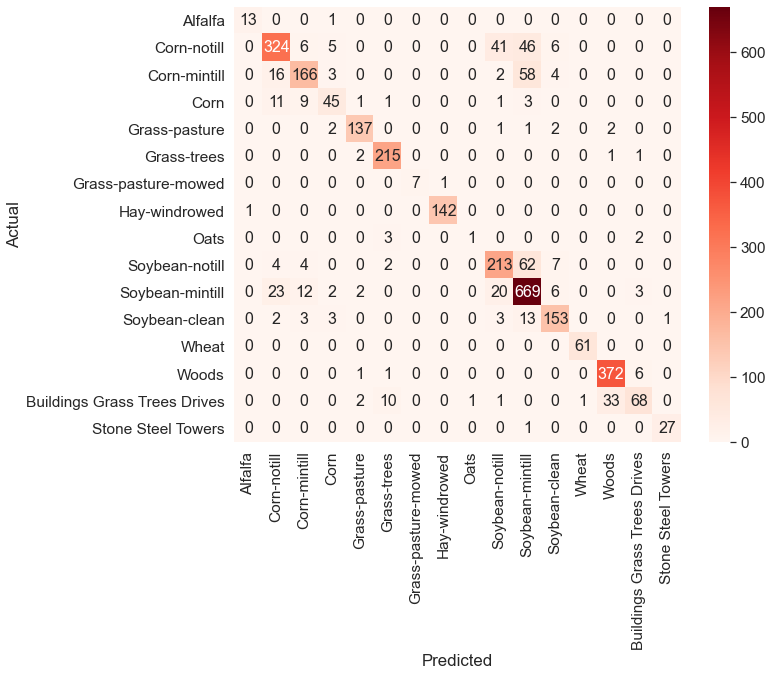

In [10]:
names = ['Alfalfa','Corn-notill', 'Corn-mintill','Corn','Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat','Woods','Buildings Grass Trees Drives','Stone Steel Towers']

data = metrics.confusion_matrix(y_test, ypred)
print(data.shape)
df_cm = pd.DataFrame(data, columns=np.array(names), index = np.array(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [11]:

print("F1 Score: ",metrics.f1_score(y_test, ypred, average='macro'))

print(metrics.classification_report(y_test, ypred, target_names = names))



0.8289882099077
                              precision    recall  f1-score   support

                     Alfalfa       0.93      0.93      0.93        14
                 Corn-notill       0.85      0.76      0.80       428
                Corn-mintill       0.83      0.67      0.74       249
                        Corn       0.74      0.63      0.68        71
               Grass-pasture       0.94      0.94      0.94       145
                 Grass-trees       0.93      0.98      0.95       219
         Grass-pasture-mowed       1.00      0.88      0.93         8
               Hay-windrowed       0.99      0.99      0.99       143
                        Oats       0.50      0.17      0.25         6
              Soybean-notill       0.76      0.73      0.74       292
             Soybean-mintill       0.78      0.91      0.84       737
               Soybean-clean       0.86      0.86      0.86       178
                       Wheat       0.98      1.00      0.99        61
   

In [3]:

bands_FDPC = loadmat('SelectedBandsOCF.mat')['band_FDPC']

bands_NC_IE = loadmat('SelectedBandsOCF.mat')['band_NC_IE']

bands_simil = loadmat('SelectedSBS.mat')['bands_simil']

bands_svd = loadmat('SelectedSBS.mat')['bands_svd']

bands_GSS = [11, 17, 26, 34, 39, 47, 56, 67]

bands_GSS = np.array(bands_GSS)

In [5]:
start = time.process_time()
### CLASSIFICATION OF DATASET###

#Read data
indian_X,indian_Y = read_indianPines()
#print(bands_FDPC[3,:]-1)
indian_X_selected = indian_X[:,:,bands_GSS]

print(indian_X_selected.shape)

#data dimensions
x, y, z = indian_X_selected.shape

#reshapes arrays to have all data of each matrix into vectors
#indian_X2d = indian_X_selected.reshape((x * y, z))
#indian_Y2d = indian_Y.reshape((x * y, 1))

data_indian = extract_pixels(indian_X_selected, indian_Y)

data_x = data_indian[data_indian['class'] != 0]

indian_X2d = data_x.iloc[:, :-1].values

indian_Y2d = data_x.loc[:, 'class'].values 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(indian_X2d, indian_Y2d, test_size=0.7, random_state=11, stratify=indian_Y2d) # 25% train 75% test
print(y_train.shape, "   ", y_test.shape)

#Creates Svm Clasiffier
Classifier = svm.SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

#Train the model using the training sets
Classifier.fit(X_train, y_train.ravel())

print("Time taken by svm with full dataset: ", time.process_time() - start)

(145, 145, 8)
(3074,)     (7175,)
Time taken by svm with full dataset:  1.140625


<class 'numpy.ndarray'> (7175,)
(16, 16)
0.7512557635324242
                              precision    recall  f1-score   support

                     Alfalfa       1.00      0.81      0.90        32
                 Corn-notill       0.59      0.70      0.64      1000
                Corn-mintill       0.67      0.45      0.54       581
                        Corn       0.69      0.64      0.67       166
               Grass-pasture       0.87      0.90      0.89       338
                 Grass-trees       0.93      0.96      0.94       511
         Grass-pasture-mowed       0.94      0.80      0.86        20
               Hay-windrowed       0.98      0.99      0.98       335
                        Oats       0.46      0.43      0.44        14
              Soybean-notill       0.65      0.59      0.62       680
             Soybean-mintill       0.71      0.82      0.76      1719
               Soybean-clean       0.63      0.34      0.44       415
                       Wheat 

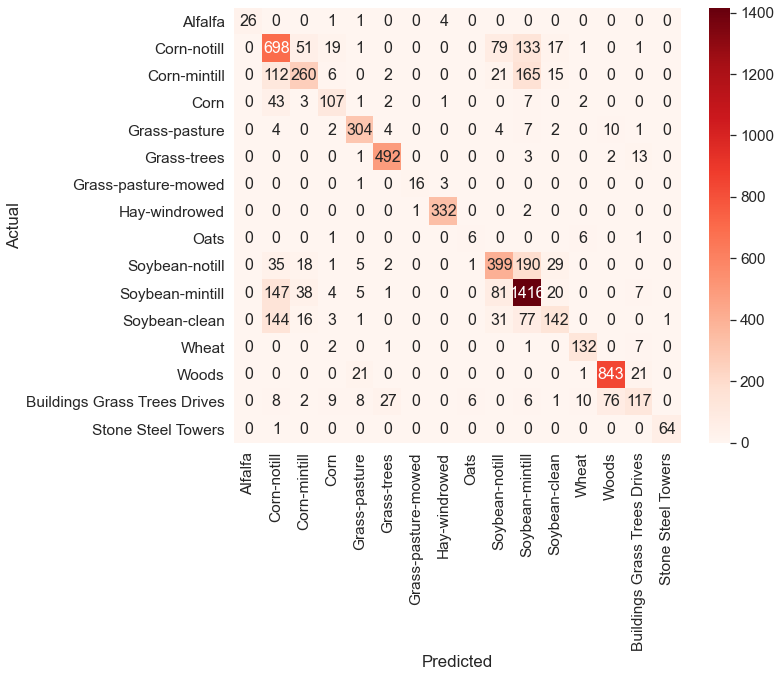

In [9]:
#PREDICTION OF ACCURACY AND VISUALIZATION

ypred = Classifier.predict(X_test)
print(type(ypred), ypred.shape)
names = ['Alfalfa','Corn-notill', 'Corn-mintill','Corn','Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat','Woods','Buildings Grass Trees Drives','Stone Steel Towers']

data = metrics.confusion_matrix(y_test, ypred)
print(data.shape)
df_cm = pd.DataFrame(data, columns=np.array(names), index = np.array(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

print(metrics.f1_score(y_test, ypred, average='macro'))

print(metrics.classification_report(y_test, ypred, target_names = names))



In [4]:
bands_EGCSR = np.zeros((4,32))

bands_EGCSR[0,:8] = np.array([132, 89, 91, 99, 85, 93, 71, 1])

bands_EGCSR[1,:16] = np.array([70, 138, 142, 81, 34, 89, 132, 120, 56, 178, 93, 2, 94, 101, 24, 85])

bands_EGCSR[2,:24] = np.array([45, 132, 17, 23, 101, 89, 98, 142, 72, 189, 120, 81, 56, 57, 174, 86, 82, 66, 94, 76, 155, 108, 138, 85])

bands_EGCSR[3,:32] = np.array([128, 140, 89, 195, 57, 14, 167, 56, 83, 29, 175, 25, 142, 81, 61, 122, 156, 120, 76, 187, 45, 101, 86, 21, 94, 138, 0, 78, 178, 108, 72, 84])

np.save("bands_EGCSR", bands_EGCSR)





In [6]:
    bands_EGCSR = np.load("bands_EGCSR.npy")
    
    bands_bombs = np.load("bands_bombs.npy")
    
    print(bands_EGCSR.shape, bands_bombs.shape)

(4, 32) (4, 32)


In [11]:
print(bands_bombs)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [nan nan nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.]]
